## Prédiction de Trajectoires Spatio-Temporelles

##### Contexte :

Les trajectoires permettent de suivre des objets et individus en mouvement via une série d’enregistrements successives de position dans l’espace (x,y,t).


Le but de ce projet est de comparer des techniques existantes de prédictions de trajectoires, à partir d’un jeu de données de trajectoires existantes. En particulier avec un cas d’études de données GPS issu de milliers personnes qui se déplacent tous les jours dans l’agglomération lyonnaise. Nous souhaitons également visualiser le résultat de ces prédictions sous forme de cartes qui étant données une position et une trajectoire partielle

Une première étape consistera à comprendre les jeux de données de trajectoires que nous fournirons et valider leur qualité.. Une deuxième étape sera le choix des méthodes d’apprentissages qui seront à identifier et à comparer (ex: arbres de décision, algorithmes de classification, mais aussi de deep learning comme CNN).


##### Plan :

1. Introduction au Machine learning
2. Les premiers modèles simples d'apprentissage
3. Application sur des données spatiales et non spatiales
4. Premier pas vers des algorithmes du machine learning


##### 1. Introduction

   En cette ère de technologie moderne, nous avons une ressource en abondance : une grande quantité de données structurées et non structurées. 

Dans la seconde moitié du vingtième siècle, l'apprentissage automatique a évolué comme un sous-domaine de l'intelligence artificielle qui impliquait le développement d'algorithmes d'auto-apprentissage pour acquérir des connaissances à partir de ces données afin de faire des prédictions. Plutôt que de demander aux humains de dériver manuellement des règles et de construire des modèles à partir de l'analyse de grandes quantités de données, l'apprentissage automatique offre une alternative plus efficace pour capturer les connaissances dans les données et améliorer les performances des modèles prédictifs. Non seulement l'apprentissage automatique prend de plus en plus d'importance dans la recherche en informatique, mais il joue également un rôle de plus en plus important dans notre vie quotidienne.

   
   Grâce à l'apprentissage automatique, nous bénéficions de solides filtres anti-spam, d'un logiciel pratique de reconnaissance vocale et de textes, de moteurs de recherche Web fiables, de joueurs d'échecs exigeants et, espérons-le, de voitures autonomes sûres et efficaces.

##### 2. Les premiers modèles simples d'apprentissage

Il existe trois types d'apprentissage automatique : l'apprentissage supervisé, l'apprentissage non supervisé et l'apprentissage par renforcement.

Nous allons s'interessé sur cette partie à l'apprentissage supervisé, et comment nous pourrons faire des prédictions sur l'avenir avec l'apprentissage supervisé

L'objectif principal de l'apprentissage supervisé est d'apprendre un modèle à partir de données expérimentaux entrées qui nous permet de faire des prédictions sur des données futures. Ici, le terme supervisé se réfère à un ensemble d'échantillons où les données de sortie souhaités sont déjà connus.

* Régression pour prédire les résultats continus

La prédiction des résultats continus, également appelée analyse de régression est un type de l'apprentissage supervisé. Dans l'analyse de régression, on nous donne un certain nombre de variables prédictives (explicatives) et une variable de réponse continue (résultat), et nous essayons de trouver une relation entre ces variables qui nous permet de prédire un résultat.

* Regression linéaire univarié : 

Régression linéaire univariée est un algorithme d’apprentissage supervisé très basique qui vise à trouver la meilleure droite possible à l’aide d’une seule variable explicative (on parle aussi d’un seul degré de liberté). Du fait de cette unique variable explicative, on parle de modèle univarié, par opposition aux modèles multivariés, qui font appel à plusieurs variables

On cherche alors à trouver la meilleure fonction hypothèse, qu’on nommera h et qui aura pour rôle d’approximer les valeurs de sortie Y.
Dans le cas de la régression linéaire à une variable, la fonction hypothèse h sera de la forme: h(x) = a x + b

Notre problème revient donc à trouver le meilleur couple (a,b) tel que h(x) soit «proche» de Y pour les couples (x, y) de notre base de données.

#### !!! Concernant les données que nous utiliserons dans le cadre de ce projet sont disponible sur [Analyse de trajectoires](https://github.com/AmigoCap/GPSFlow/blob/master/3-Segmentation.ipynb)

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
raw = pd.io.json.read_json("data/iphone.json") # Collecte des données à partir du fichier iphone.json
df = raw['locations'].apply(pd.Series) 

# Filtrer les données : latitude and longitude columns
df['latitude'] = df['latitudeE7'] * 0.0000001
df['longitude'] = df['longitudeE7'] * 0.0000001

columns = ["latitude", "longitude"]
for col in list(df) :
	if col not in columns :
		del df[col]

In [18]:
df.head() # Table des données

,latitude,longitude
0,45.756972,4.834450
1,45.756961,4.834579
2,45.756251,4.833615
3,45.756069,4.833665
4,45.752833,4.832869


In [8]:
npMatrix = np.matrix(df)
X, Y = npMatrix[:,0], npMatrix[:,1] # X represente la matrice colonne de latitude / Y represente la matrice colonne de longitude
mdl = LinearRegression().fit(X,Y) 
a = mdl.coef_[0] 
b = mdl.intercept_
print("La droite de regression")
print("Y = ",a,"X"," + ",b );

La droite de regression
Y =  [-1.22338024] X  +  [60.80017603]


#### !!! Pour le calcul détailler de la manière de détermination des coefficient a et b ==> [Regression linéaire](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire)

Pour évaluer la qualité de la prédiction, on peut utiliser différents critères.

Dans un premier temps rappelons que : 
* SSR  est la variation expliquée par la régression. 
* SSE ou SCR est la variation expliquée par les résidus. 
* SST = SCT = SSE + SSR est la variation totale. 

Nous pouvons alors définir le coefficient de détermination (<math>R^2</math>) comme le ratio entre la somme des carrés des écarts à la moyenne des valeurs prédites et la somme des carrés des écarts à la moyenne des valeurs expliquées :

* <math>R^2</math> = SSR / SST = (SCT - SSE)/SCT

Le coefficient de détermination varie entre 0 et 1. Lorsqu'il est proche de 0, le pouvoir prédictif du modèle est faible et lorsqu'il est proche de 1, le pouvoir prédictif du modèle est fort.

In [5]:
# Transformation des matrices X et Y en array list pour pourvoir ensuite les représentées par les méthodes scatter et plot

x = [0]*23
y = [0]*23
for j in range(0,23):
    a = numpy.array(X)[j]
    for i in a:
        x[j] = i
for j in range(0,23):
    a = numpy.array(Y)[j]
    for i in a:
        y[j] = i
    

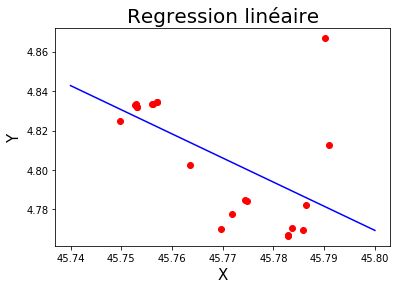

In [20]:
R1 = np.polyfit(x,y,1)
plt.plot(x,y,'ro')
xp = np.linspace(45.74,45.80,100)
plt.plot(xp,np.polyval(R1,xp),'b-')
plt.title('Regression linéaire', fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

In [21]:
print("\nRésultat retrouvé par le modèle de regression linéaire -Regression polynomiale ordre 1- \n")
yfit1 = [0]*23
for i in range(0,23):
    yfit1[i] = R1[0]*x[i] + R1[1]
    
print(yfit1)

print("\nRésultat observé \n")
print(y)


Résultat retrouvé par le modèle de regression linéaire -Regression polynomiale ordre 1- 

[4.82199983857479, 4.822013785109569, 4.822881895730859, 4.82310479561135, 4.8270636540815985, 4.826821057779171, 4.827246304752059, 4.826624827587999, 4.8270636540815985, 4.8269339757757095, 4.830739789377404, 4.8139063218932066, 4.800141214399503, 4.800696629030369, 4.785924067905562, 4.7867421422748535, 4.789271358591726, 4.790264865688037, 4.7903883047546785, 4.806557109752198, 4.8038172273572854, 4.780447973256457, 4.78145750663397]

Résultat observé 

[4.8344499, 4.834579499999999, 4.8336146, 4.8336654, 4.8328691, 4.8317989, 4.8330239, 4.8319668, 4.8328691, 4.8336622, 4.8248717999999995, 4.8026206, 4.7841689999999994, 4.7847786999999995, 4.7824659, 4.7694933, 4.770413899999999, 4.766565, 4.766814, 4.7699888, 4.7777848, 4.8128654, 4.8667777]


In [22]:
print("Modèle 1 : Regression linéaire \n")
# Calcul de l'erreur commise

yresid1 = [0]*23
for i in range (0,23):
    yresid1[i] = y[i] - yfit1[i]

# Calcul de l'ecart quadratique
SSresid1 = 0 

for i in range (0,23):
    SSresid1 += yresid1[i]**2

SStotal1 = len(y)*var(y)

#Calcul du coefficient de détermination

rsq1 = 1 - (SSresid1/SStotal1)
print("le coefficient de détermination = ",rsq1*100,"%\n")
print("On peut dire que le modèle linéaire est loin d'etre un modèle qui correspond à la réalité ")

Modèle 1

le coefficient de détermination =  34.17919224986261 %

On peut dire que le modèle linéaire est loin d'etre un modèle qui correspond à la réalité 


##### * Regression polynomiale :

La régression polynomiale est une extension de la régression linéaire multivariée. Elle permet de lier les variables par un polynôme de degré k. Les polynômes ont une particularité car ils permetent d’introduire de la non-linéarité dans les relations entre variables.

Intuitivement, chaque nouvel ordre va permettre d’ajouter un «pli» à la courbe.Selon la notation déjà employée, pour calculer h(x), on évalue chaque variable en l’associant à tous les degrés polynomiaux de 1 à k. Chacun de ces polynômes a son propre coefficient. Par exemple, un modèle polynomial de degré 2 à une variable explicative s’écrira: h(x) = a x² + b x + c

En pratique, les calculs sont les mêmes que dans le cas de la régression linéaire traditionnelle (la régression linéaire n’est en fait qu’une régression polynomiale de degré 1). L’introduction de termes polynomiaux dans un modèle de régression permet donc de modéliser simplement des relations potentiellement très complexes. [regression polynomiale](https://fr.wikipedia.org/wiki/R%C3%A9gression_polynomiale)

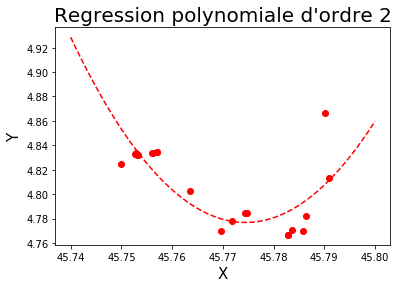

In [23]:
R2 = np.polyfit(x,y,2)
plt.plot(x,y,'ro')
plt.plot(xp,np.polyval(R2,xp),'r--')
plt.title("Regression polynomiale d'ordre 2", fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

In [27]:
print("\nRésultat retrouvé par le modèle de regression polynomiale ordre 2- \n")
yfit2 = [0]*23
for i in range(0,23):
    yfit2[i] = R2[0]*x[i]*x[i] + R2[1]*x[i] + R2[2]
    
print(yfit2)

print("\nRésultat observé \n")
print(y)


Résultat retrouvé par le modèle de regression polynomiale ordre 2- 

[4.815947800758295, 4.8159987754770555, 4.819236988492776, 4.820089171640575, 4.836635431740433, 4.835544653353281, 4.837463297997601, 4.834669688309077, 4.836635431740433, 4.836051115242299, 4.854392051522154, 4.79195814562263, 4.776800419844221, 4.776786746748257, 4.795049558277242, 4.79306529549649, 4.787652120867278, 4.785824032383971, 4.785608650359791, 4.779846930643544, 4.777687563677318, 4.8112694510491565, 4.807894979428966]

Résultat observé 

[4.8344499, 4.834579499999999, 4.8336146, 4.8336654, 4.8328691, 4.8317989, 4.8330239, 4.8319668, 4.8328691, 4.8336622, 4.8248717999999995, 4.8026206, 4.7841689999999994, 4.7847786999999995, 4.7824659, 4.7694933, 4.770413899999999, 4.766565, 4.766814, 4.7699888, 4.7777848, 4.8128654, 4.8667777]


In [26]:
print("Modèle 2 : regression polynomiale d'ordre 2\n")
# Calcul de l'erreur commise

yresid2 = [0]*23
for i in range (0,23):
    yresid2[i] = y[i] - yfit2[i]

# Calcul de l'ecart quadratique
SSresid2 = 0 

for i in range (0,23):
    SSresid2 += yresid2[i]**2

SStotal2 = len(y)*var(y)

#Calcul du coefficient de détermination

rsq2 = 1 - (SSresid2/SStotal2)
print("le coefficient de détermination = ",rsq2*100,"%\n")
print("Le modèle suivant a un coefficient de dertemination deux fois plus grand que le premier, c'est à dire que plus on augmente le degrès plus on s'approche à un modèle adapté")

Modèle 2 : regression polynomiale d'ordre 2

le coefficient de détermination =  63.24525413920718 %

Le modèle suivant a un coefficient de dertemination deux fois plus grand que le premier, c'est à dire que plus on augmente le degrès plus on s'approche à un modèle adapté


### Resumé sur les modèles de régression

[ 1.01260652e+04 -1.39030730e+06  6.36296597e+07 -9.70704654e+08]


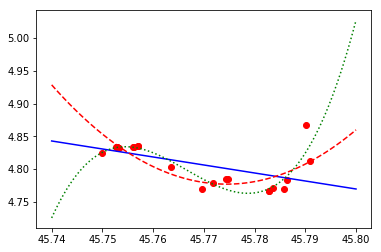

In [40]:
P1 = np.polyfit(x,y,1)
P2 = np.polyfit(x,y,2)
P3 = np.polyfit(x,y,3)

plt.plot(x,y,'ro')
xp = np.linspace(45.74,45.80,100)

plt.plot(xp,np.polyval(P1,xp),'b-')
plt.plot(xp,np.polyval(P2,xp),'r--')
plt.plot(xp,np.polyval(P3,xp),'g:')


###### !!! Plus le degrès de regression est grand plus la regression est meilleur

#### * Curve Fitting

Curve fitting ou l'ajustement de courbe, également appelée lissage, est une procédure statistique dont le but est de définir une courbe ou une surface relativement lisse qui décrit le comportement de la variable de réponse généralement sans référence à un modèle significatif. L'application la plus fréquente de l'ajustement de la courbe est pour les données de séries chronologiques, mais il y a beaucoup d'autres applications. Les méthodes d'ajustement des courbes sont également utilisées pour ajuster les réponses impliquant plusieurs facteurs.

[ 1.28673614e+02 -1.17799286e+04  2.69614670e+05]


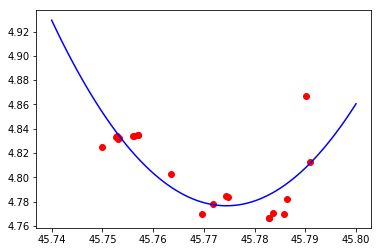

In [58]:
from scipy.optimize import curve_fit

def fit_func(x, a, b, c):   # Le choix de la forme de la fonction d'ajustement
    return a*(x**2) + b*(x) + c

params = curve_fit(fit_func, x, y)

[a, b, c] = params[0]
print(params[0])

plt.plot(x,y,'ro')
xp = np.linspace(45.74,45.80,100)

plt.plot(xp,np.polyval(params[0],xp),'b-')

On remarque que le résultat obtenu est pareil à celui de la régression d'ordre 2, car la forme de la fonction que nous avons choisi à une forme polynomiale d'ordre 2.

##### 3. Application sur des données spatiales et non spatiales

* régression multiple linéeaire 

La régression linéaire multiple est à certains égards une extension relativement simple de la régression linéaire simple qui permet plus d'une variable indépen- dante. L'objectif de la régression multiple est le même que celui de la régression sim-ple; c'est-à-dire que nous voulons utiliser la relation entre une variable de réponse (dépendante) et une variable de facteur (indépendante) pour prédire ou expliquer le comportement de la variable de réponse. Cependant, les calculs sont beaucoup plus compliqués et doivent être effectués par des ordinateurs, principalement parce qu'il peut y avoir des relations entre les variables indépendantes.

Dans le cas de notre projet, on pourra élargir le domaine de nos prévisions en fonction d'autres paramètes explicatives (par exemple la vitesse)

Notre fonction h(x) qui reprensente la relation entre les variables explicatives aura la forme suivante : **h(x,v) = a + b x + c v** ou v est la vitesse de déplacement

In [58]:
#Extraction des données à partir du fichier JSON
import datetime
import distance

def importJson(filepath, addColumns=True) :

	# Loading data
	raw = pd.io.json.read_json(filepath)
	df = raw['locations'].apply(pd.Series)

	# Create latitude and longitude columns
	df['latitude'] = df['latitudeE7'] * 0.0000001
	df['longitude'] = df['longitudeE7'] * 0.0000001

	# Clean up columns
	columns = ["timestampMs", "latitude", "longitude"]
	for col in list(df) :
		if col not in columns :
			del df[col]

	# Add date column in format 'dd-mm-YY'
	dates = []
	for timestamp in df['timestampMs']:
		dates.append(datetime.datetime.fromtimestamp(int(timestamp) / 1000).strftime('%d-%m-%Y'))
	df['date'] = dates

	# Add time column in format 'HH:MM:SS'
	time = []
	for row in df['timestampMs']:
		time.append(datetime.datetime.fromtimestamp(int(row) / 1000).strftime('%H:%M:%S'))
	df['time'] = time

	if not addColumns :
		return df
	else :
		# Add delay column seconds
		delay = []
		delay.append(0)
		for i in range(df['timestampMs'].size - 1):
			delay.append(int(int(df['timestampMs'][i]) - int(df['timestampMs'][i + 1])) / 1000)
		df['delay'] = delay

		# Add distance, velocity and acceleration 
		df['distance'] = distance.getDistances(df)
		df['velocity'] = distance.getVelocities(df)
		df['acceleration'] = distance.getAccelerations(df)

		return df

def selectDate(date, df) :
	result = df[df['date'] == date]
	return result.reset_index(drop=True) # Reset indices of dataframe
	

In [43]:
iphone_df = importJson("iphone.json")

In [45]:
npMatrix = np.matrix(iphone_df) 

#Transformation des matrices en liste

def transliste(Matrix):
    x = [0]*50
    for j in range(0,50):
        a = numpy.array(Matrix)[j]
        for i in a:
            x[j] = i
    return x

In [46]:
X, Y, time,vitesse = transliste(npMatrix[:,1]), transliste(npMatrix[:,2]), transliste(npMatrix[:,4]), transliste(npMatrix[:,7])

In [57]:
VarExp = [[0] * 2 for _ in range(50)] #Matrice des données des variables explicatives (X,V (vitesse))

for j in range(0,50):
    VarExp[j][0]= X[j]

for j in range(50):
    VarExp[j][1]= vitesse[j]

In [48]:
import statsmodels.api as sm #Importation d'un api permettant de calculer les coeffs de la régression multiple
X_1=sm.add_constant(VarExp)
results=sm.OLS(Y,X_1).fit()
results.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([-1.21635677e+02,  2.76303812e+00, -3.86420326e-04])

Après l'implémenter la régression multiple linéaire, nous avons eu comme résultat les 3 coefficients de l'équation de régression

In [59]:
a = results.params[0]
print('a = ',a)
b = results.params[1]
print('b =',b)
c = results.params[2]
print('c =',c)
print('\n')
print("Donc notre équation s'écrit sous la forme suivant Y = ",a,"+",b," X -",-c," V")

a =  -121.63567714705755
b = 2.7630381194584888
c = -0.0003864203261737774


Donc notre équation s'écrit sous la forme suivant Y =  -121.63567714705755 + 2.7630381194584888  X - 0.0003864203261737774  V
